In [66]:
## imports and configuration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt

In [67]:
rawData = pd.read_csv('life-expectancy-vs-gdp-per-capita.csv',  delimiter=',')
rawData.sample(5)


,Entity,Code,Year,Life expectancy,GDP per capita,145446-annotations,Population (historical estimates),Continent
46813,Seychelles,SYC,2006,72.299,16824.6125,NaN,89528.0,NaN
22615,Hong Kong,HKG,1780,NaN,NaN,NaN,16986.0,NaN
30385,Madagascar,MDG,1897,NaN,NaN,NaN,2801168.0,NaN
22952,Hungary,HUN,1850,NaN,NaN,NaN,5159819.0,NaN
8723,Cameroon,CMR,2008,54.153,2352.7995,NaN,19252674.0,NaN


In [121]:
#Data filtering 
# Only use data from 2018
#Assuming that rawData is a Pandas DataFrame containing a column named 'Year' and you want
#to filter the data to only include rows with a value of 2018 in the 'Year' column, 
#you can use the following code:
df = rawData[rawData['Year'] == 2018]


#Data Cleaning 
#remove rows with NaN (Not a number) values with a specific coloumns from the df 
df = df.dropna(subset=['GDP per capita'], how='any')
df = df.dropna(subset=['Life expectancy'], how='any')

# remove irrelevant columns 
if '145446-annotations' in df:
    del df['145446-annotations']
if 'Continent' in df:
    del df['Continent']


# remove duplicates
sorted_df.drop_duplicates(subset='Entity', keep='first', inplace=True)


#Save clean dataset
clean_data = []

for item in 'life-expectancy-vs-gdp-per-capita.csv':
    if isinstance(item, int):
        clean_data.append(item)
    elif isinstance(item, str) and item.isnumeric():
        clean_data.append(int(item))

print(clean_data)


df.sample(15)


[]


,Entity,Code,Year,Life expectancy,GDP per capita,Population (historical estimates)
40866,Paraguay,PRY,2018,74.131,9338.9484,6956069.0
18013,France,FRA,2018,82.541,38515.9193,64990512.0
55931,United Arab Emirates,ARE,2018,77.814,76397.8181,9630966.0
8474,Cambodia,KHM,2018,69.570,3628.5611,16249795.0
19617,Germany,DEU,2018,81.180,46177.6187,83124413.0
41121,Peru,PER,2018,76.516,12310.0847,31989265.0
6586,Bosnia and Herzegovina,BIH,2018,77.262,10460.5201,3323929.0
49808,Spain,ESP,2018,83.433,31496.5200,46692863.0
52185,Taiwan,TWN,2018,80.283,44663.8642,23726460.0
14282,Dominican Republic,DOM,2018,73.892,15912.3995,10627147.0


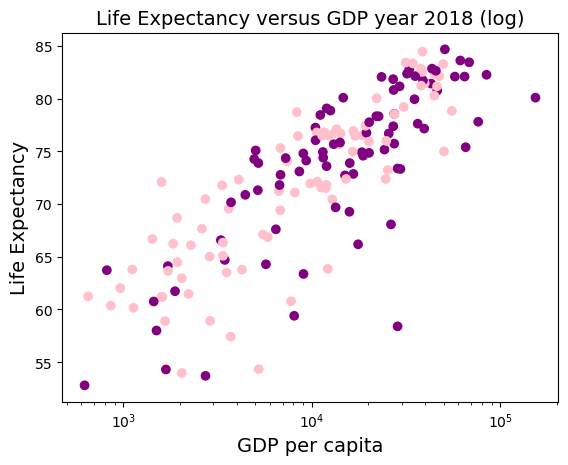

In [122]:
# Plot data
# Define the conditions for coloring the points

pop_colors = ['pink' if pop >= median_pop else 'purple' for pop in df['Population (historical estimates)']]

# Plot the second scatter plot with colors based on population
plt.scatter(df['GDP per capita'], df['Life expectancy'], c=pop_colors)
plt.xscale("log")
plt.title("Life Expectancy versus GDP year 2018 (log)", fontsize=14)
plt.xlabel("GDP per capita", fontsize=14)
plt.ylabel("Life Expectancy", fontsize=14)
plt.show()

In [123]:
# Calculate the standard deviation and mean of the 'Life expectancy at birth (historical)' column
#std = standrad deviation 
life_expectancy_std = df['Life expectancy'].std()
life_expectancy_mean = df['Life expectancy'].mean()

# Select rows from the df where the life expectancy is greater than the mean plus one standard deviation
high_le_countries = df.loc[df['Life expectancy'] > life_expectancy_mean + life_expectancy_std, ['Entity', 'Life expectancy']]

# Sort the resulting DataFrame in descending order by life expectancy and extract only the top 10 rows
high_le_countries_sorted = high_le_countries.sort_values(by='Life expectancy', ascending=False).head(10)

# Print the top 10 rows of the sorted DataFrame
print(high_le_countries_sorted)

            Entity  Life expectancy
22575    Hong Kong           84.687
25991        Japan           84.470
51740  Switzerland           83.630
47306    Singapore           83.458
49808        Spain           83.433
25062        Italy           83.352
3110     Australia           83.281
23205      Iceland           82.855
49270  South Korea           82.846
24724       Israel           82.819


In [130]:
# calculate GDP for each country
df['GDP'] = df['GDP per capita'] * df['Population (historical estimates)']

# calculate the median life expectancy and GDP
median_gdp, median_life_expectancy = df[['GDP', 'Life expectancy']].median()

# filter the dataframe to select countries with life expectancy above median and GDP below median
filtered_df = df[(df['Life expectancy'] > median_life_expectancy) & (df['GDP'] < median_gdp)]

# select columns to include in the final output
columns_to_select = ['Entity', 'Life expectancy', 'GDP', 'Population (historical estimates)']

# sort the filtered dataframe by life expectancy in descending order
sorted_df = filtered_df[columns_to_select].sort_values(by='Life expectancy', ascending=False)
# remove duplicates
sorted_df.drop_duplicates(subset='Entity', keep='first', inplace=True)

# display the final output
print(sorted_df)

                       Entity  Life expectancy           GDP  \
23205                 Iceland           82.855  1.462628e+10   
31507                   Malta           82.376  1.406886e+10   
29967              Luxembourg           82.102  3.470022e+10   
47887                Slovenia           81.172  6.076612e+10   
12639                  Cyprus           80.828  3.232939e+10   
11528              Costa Rica           80.095  7.342309e+10   
4633                 Barbados           79.081  3.438300e+09   
28364                 Lebanon           78.875  8.614708e+10   
12310                    Cuba           78.726  9.439722e+10   
15883                 Estonia           78.567  3.625928e+10   
588                   Albania           78.458  3.201037e+10   
12040                 Croatia           78.342  9.149214e+10   
40344                  Panama           78.329  9.455238e+10   
57360                 Uruguay           77.770  6.962680e+10   
6586   Bosnia and Herzegovina           

In [137]:
# Calculate the mean GDP per capita
mean_gdp_per_capita = df['GDP per capita'].mean()

# Define boolean mask for filtering
is_above_mean_gdp_per_capita = df['GDP per capita'] > mean_gdp_per_capita

# Filter the dataframe using the mask
filtered_df = df[is_above_mean_gdp_per_capita]

# Select columns of interest
columns_to_keep = ['Entity', 'Life expectancy', 'GDP per capita', 'GDP', 'Population (historical estimates)']
result_df = filtered_df.loc[:, columns_to_keep]

# Remove duplicates based on the 'Entity' column
deduplicated_result_df = result_df.drop_duplicates(subset='Entity')

# Sort the results by GDP per capita in descending order and return top 5 rows
top_5_result_df = deduplicated_result_df.sort_values(by='GDP per capita', ascending=False).head(5)

print(top_5_result_df)

                     Entity  Life expectancy  GDP per capita           GDP  \
43107                 Qatar           80.100     153764.1643  4.277230e+11   
38966                Norway           82.271      84580.1362  4.514854e+11   
55931  United Arab Emirates           77.814      76397.8181  7.357848e+11   
47306             Singapore           83.458      68402.3451  3.938267e+11   
27239                Kuwait           75.398      65520.7367  2.710799e+11   

       Population (historical estimates)  
43107                          2781682.0  
38966                          5337960.0  
55931                          9630966.0  
47306                          5757503.0  
27239                          4137314.0  
